# Material Selection

Material selection is a step in the design of any structure. Material selection can be viewed as a methodology to selct the best material that meet performance goals and design specifications.
Material selection should then always starts with a carefull review of *specifications* that accompanies any structural design.

It should be noted that material selection blongs to a top-down approach, where specifications are the entry point. An even more advanced material selection approach would lead to a *material by design* approach, where the material microstructure is optimized according to the design specifications.

An engineering definition would be that material selection objective is a to minimize cost while meeting product performance goals. Systematic selection of the best material for a given application begins with properties and costs of candidate materials. Specific material characteristics are then targeted to achieve the specifications goals:

For example, a material for insulation applications should have a low thermal conductivity to minimize heat transfer through it. As a scond example, a material for cutting tools should have the following characteristics:
1. Hardness: hardness and strength at high temperatures.
2. Toughness: so that tools do not chip or fracture.
3. Wear resistance: to achieve an acceptable tool life .

This second example emphasizes that material selection for applications requiring multiple criteria is more complex. 
This is actually almost all the time the case, since density (to reduce the weight of the structure), and cost are almost all the time present in specifications, at different critical levels.

It should be noted that material selection is actually linked with the geometry of the structure, and the type of loads/fluxes that materials should bear. 
For example, suppose that in an assembly a rod is supposed to be loaded in its axis direction. Specifications are high for the structure to be rigid, and leightweigth. 

In this rod the relation between Force F and displacement stroke $\Delta l$ is:

$$F = K \Delta l$$

While the relation between force and uniaxial stress $\sigma$ in the rod axis is $F = S \sigma$, $S$ being the rod section. For a rod of length $l$, the constitutive equation (here expressed in 1D), links the 

$$\sigma = E \varepsilon = E \frac{\Delta l}{l} = K \frac{\Delta l}{S}$$

So that $K = E \frac{S}{l}$

So for a prescribed force, the best material sould maximize so that either $E$ is maximized, either $S$ is maximized (for a given length $l$). Since we have:

$\rho = \frac{m}{V} = \frac{m}{S\,l}$, 

A good material for this rod should then stiff and light, which requires a material with high Young's modulus and low density.

If the rod will be pulled in tension, the specific modulus, or modulus divided by density $E/\rho$, will determine the best material. But because a plate's bending stiffness scales as its thickness cubed, the best material for a stiff and light plate is determined by the cube root of stiffness divided by density $\sqrt[3]{E}/\rho$. For a stiff beam in bending the material index is $\sqrt{E}/\rho$.




## Ashby plots

Ashby plots, or Ashby maps, represents named for Michael Ashby of Cambridge University, is a scatter plot which displays two or more properties of many materials or classes of materials. These plots are useful to compare the ratio between different properties. For the example of the stiff/light part discussed above would have Young's modulus on one axis and density on the other axis, with one data point on the graph for each candidate material. On such a plot, it is easy to find not only the material with the highest stiffness, or that with the lowest density, but that with the best ratio $E/\rho$. 

As material demand worlwide is more and more important and renewable material to replace legacy technical material is an important step in the sustainable design of structures, important concepts such as 'cost per unit of function', while cost is defined as a cost depending on the LCA (life cycle analysis) of materials.
For example, if the key design objective was the stiffness of a plate of the material, as described in the introductory paragraph above, then the designer would need a material with the optimal combination of density, Young's modulus, and cost.

The following notebook will help you to understand how to plot your own Ashby maps from a material database

In [1]:
%matplotlib inline

import pylab
from pylab import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from simmit import smartplus as sim
from simmit import identify as iden
from simmit import clean_data as cl
from simmit import ashby as ash
import math as m
import os
dir = os.path.dirname(os.path.realpath('__file__'))

plt.rc('text', usetex=True)
plt.rc('font', family='arial', size = 16)

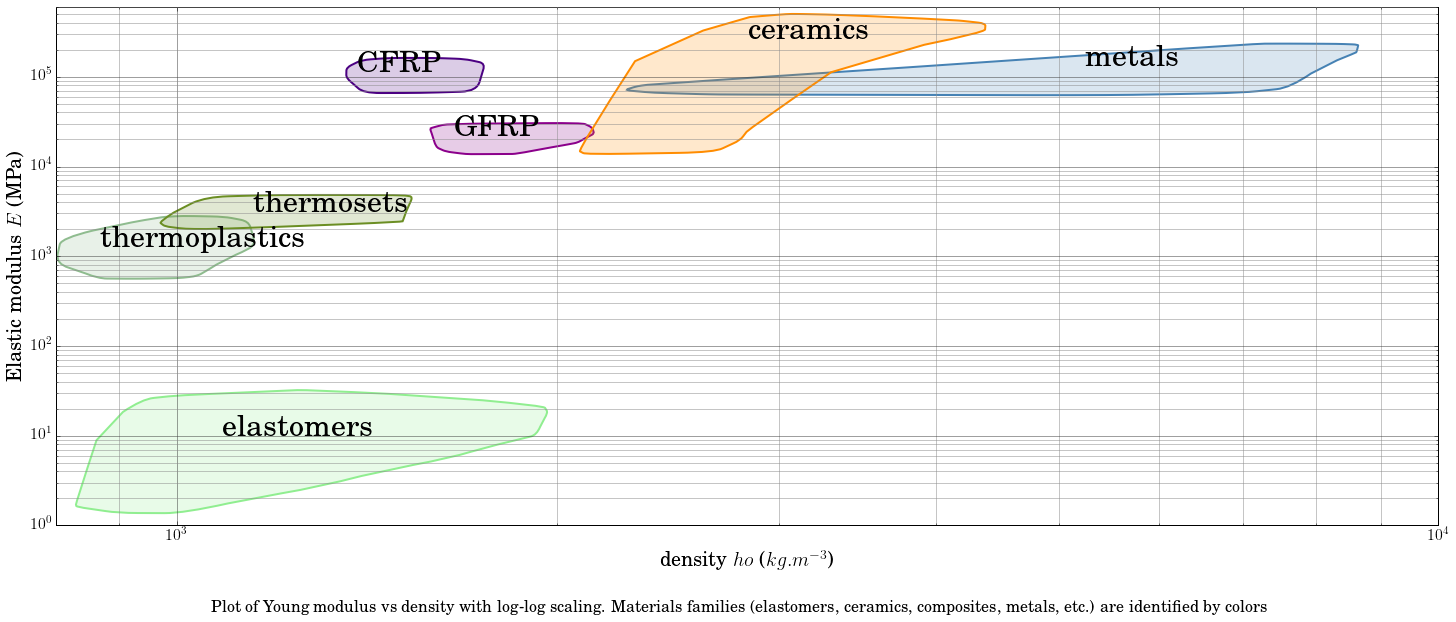

In [2]:
pylab.rcParams['figure.figsize'] = (24.0, 12.0) #configure the figure output size

data_base_path = dir + '/database_materials/'
data_path = dir + '/data/'
data_family = {}
data_family_files=['thermosets', 'thermoplastics', 'elastomers', 'CFRP', 'GFRP', 'ceramics', 'metals']
colors = {}
colors_types = ['OliveDrab', 'DarkSeaGreen', 'LightGreen', 'Indigo', 'DarkMagenta', 'DarkOrange', 'SteelBlue']

for k, p in zip(data_family_files, colors_types):
    file=data_base_path+ k +'.txt'
    data_family[k] = np.loadtxt(file)
    colors[k] = p
        
#Plot the first figure, density vs actuation strain
fig = plt.figure()

for k, key in enumerate(data_family.keys()):
    rho = data_family[key][:,3]
    E = data_family[key][:,1]
    points = np.vstack([rho,E]).T
    rhoavg = np.mean(rho)
    Eavg = np.mean(E)
    plt.annotate(key,xy=(rhoavg,Eavg),xytext=(rhoavg*0.9,Eavg), color='black', size=30)    
#    plt.text(0.05, 0.95, 'fbeqilwe', xycoords='data', fontsize=16, fontweight='bold')    
    ash.poly_convexHull(points, colors[key], coef_multi=0.1, rad=0.3, lw=2)
#   poly_enclose(points, colors[k], inc=inc, rad=0.2, lw=lw)
#   ellip_enclose(points, colors[k], inc=1, lw=lw)

plt.grid(True,which="major",ls="-", color='0.25')
plt.grid(True,which="minor",ls="-", color='0.55')
plt.xlabel('density $\rho$ ($kg.m^{-3}$)', size=20)
plt.ylabel('Elastic modulus $E$ (MPa)', size=20) 
plt.loglog()
plt.xlim(0.,10000.0)    
plt.ylim(1E0,600000)
gca().set_position((.01, .2, .8, .6)) # make room for caption
caption = 'Plot of Young modulus vs density with log-log scaling. Materials families (elastomers, ceramics, composites, metals, etc.) are identified by colors'
fig.text(.1,.1,caption)
plt.show()

In [3]:
umat_name = 'MIPLN' #This is the 5 character code for the Mori-Tanaka homogenization for composites with a matrix and ellipsoidal reinforcments
nstatev = 0

nphases = 2 #The number of phases
num_file = 0 #The num of the file that contains the subphases

psi_rve = 0.
theta_rve = 0.
phi_rve = 0.

props = np.array([nphases, num_file])

NPhases_file = dir + '/data/Nlayers0.dat'
NPhases = pd.read_csv(NPhases_file, delimiter=r'\s+', index_col=False, engine='python')
NPhases[::]

,Number,umat,save,c,psi_mat,theta_mat,phi_mat,psi_geom,theta_geom,phi_geom,nprops,nstatev,props
0,0,ELISO,1,0.6,0,0,0,0.0,90.0,-90.0,3,1,3000
1,1,ELISO,1,0.4,0,0,0,0.0,90.0,-90.0,3,1,210000


In [4]:
L = sim.L_eff(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, data_path)
print(sim.check_symetries(L))
p = sim.L_isotrans_props(L, 3)
E_L_comp = p[0]
E_T_comp = p[1]
rho_0 = 1.25E3
rho_1 = 7.85E3
rho_comp = NPhases.c[0]*rho_0 + NPhases.c[1]*rho_1
print p

{'props': array([  9.99422932e+03,   8.58209424e+04,   3.98703565e-01,
         3.02268761e-01,   1.77006069e+03]), 'maj_sym': 1, 'umat_type': 'ELIST', 'axis': 3}
[  9.99422932e+03   8.58209424e+04   3.98703565e-01   3.02268761e-01
   1.77006069e+03]


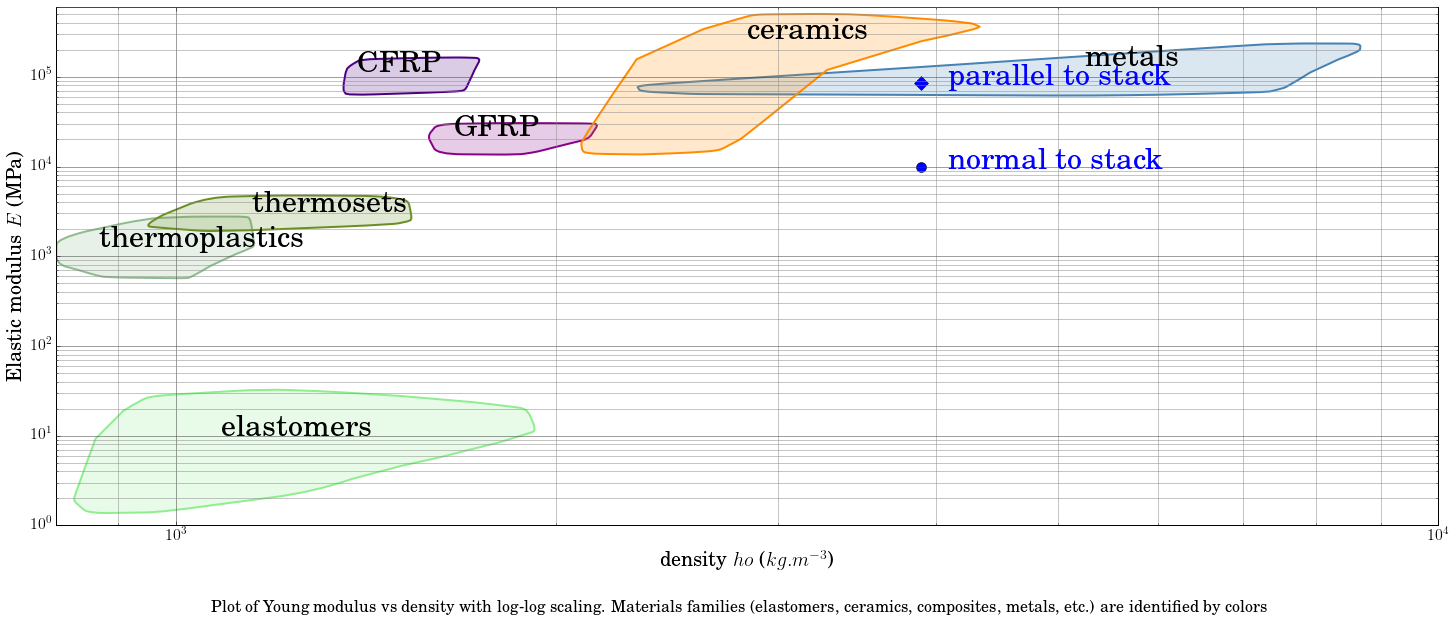

In [5]:
#Plot the first figure, density vs actuation strain
fig = plt.figure()

for k, key in enumerate(data_family.keys()):
    rho = data_family[key][:,3]
    E = data_family[key][:,1]
    points = np.vstack([rho,E]).T
    rhoavg = np.mean(rho)
    Eavg = np.mean(E)
    plt.annotate(key,xy=(rhoavg,Eavg),xytext=(rhoavg*0.9,Eavg), color='black', size=30)    
#    plt.text(0.05, 0.95, 'fbeqilwe', xycoords='data', fontsize=16, fontweight='bold')    
    ash.poly_convexHull(points, colors[key], coef_multi=0.1, rad=0.3, lw=2)
#   poly_enclose(points, colors[k], inc=inc, rad=0.2, lw=lw)
#   ellip_enclose(points, colors[k], inc=1, lw=lw)

plt.plot(rho_comp, E_L_comp, linestyle='None', marker='o', color='blue', markersize=10)
plt.annotate('normal to stack',xy=(rho_comp,E_L_comp),xytext=(rho_comp*1.05,E_L_comp*0.95), color='blue', size=30)    
plt.plot(rho_comp, E_T_comp, linestyle='None', marker='D', color='blue', markersize=10)
plt.annotate('parallel to stack',xy=(rho_comp,E_T_comp),xytext=(rho_comp*1.05,E_T_comp*0.95), color='blue', size=30)

plt.grid(True,which="major",ls="-", color='0.25')
plt.grid(True,which="minor",ls="-", color='0.55')
plt.xlabel('density $\rho$ ($kg.m^{-3}$)', size=20)
plt.ylabel('Elastic modulus $E$ (MPa)', size=20) 
plt.loglog()
plt.xlim(0.,10000.0)    
plt.ylim(1E0,600000)
gca().set_position((.01, .2, .8, .6)) # make room for caption
caption = 'Plot of Young modulus vs density with log-log scaling. Materials families (elastomers, ceramics, composites, metals, etc.) are identified by colors'
fig.text(.1,.1,caption)
plt.show()